<p style="font-family:Verdana; font-size: 26px; color: magenta"> 1 ML - Heart Disease Prediction Using Logistic Regression</p>

<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 1. Data Collection:</p> 
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 2. Data Preprocessing:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 3. Feature Selection:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 4. Splitting the Dataset:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 5. Training the Model:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 6. Evaluating the Model:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 7. Making Predictions:</p>

<p style="font-family:Verdana; font-size: 18px; color: orange"> Step 1: Importing Necessary Libraries</p>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 2: Data Preparation</p>

In [6]:
# In this step we load the dataset and encode disease labels into numbers 
# and visualize class distribution to check for imbalance.
df = pd.read_csv('../../data/framingham.csv')
df.drop(['education'], inplace = True, axis = 1)
df.rename(columns ={'male':'Sex_male'}, inplace = True)
# This removes any rows with missing values (NaN) from the DataFrame.
df.dropna(axis = 0, inplace = True)
df.head(), df.shape 

(   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
 0         1   39              0         0.0     0.0                0   
 1         0   46              0         0.0     0.0                0   
 2         1   48              1        20.0     0.0                0   
 3         0   61              1        30.0     0.0                0   
 4         0   46              1        23.0     0.0                0   
 
    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
 0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
 1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
 2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
 3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
 4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
 
    TenYearCHD  
 0           0  
 1           0  
 2           0  
 3        

In [7]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3179
1     572
Name: count, dtype: int64

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 3: Splitting the Dataset into Test and Train Sets</p>

In [9]:
# X=preprocessing.StandardScaler().fit(X).transform(X): 
# This scales the features in X to have a mean of 0 and standard deviation of 1 using StandardScaler
# Training set (70% of data, X_train and y_train)
# Test set (30% of data, X_test and y_test)
# random_state=42 ensures the split is reproducible.
from sklearn.model_selection import train_test_split

In [10]:
X = np.asarray(df[['age', 'Sex_male', 'cigsPerDay', 
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(df['TenYearCHD'])

X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 4: Exploratory Data Analysis of Heart Disease Dataset</p>

In [11]:
# Exploratory Data Analysis (EDA) is a important step in data science as it visualizing data to understand its main features, 
# find patterns and discover how different parts of the data are connected

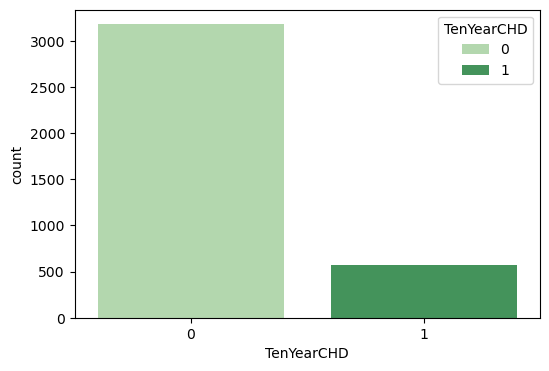

In [24]:
# Ten Year's CHD Record of all the patients available in the dataset:
# This creates a count plot using Seaborn.
# distribution of the values in the TenYearCHD column 
# showing how many individuals have heart disease (1) vs. how many don’t (0).
plt.figure(figsize=(6, 4))
sns.countplot(x='TenYearCHD', data=df,
             hue='TenYearCHD',
             palette="Greens")
plt.show()

> The count plot shows a high imbalance in the dataset 

>> Counting number of patients affected by CHD where (0= Not Affected; 1= Affected)

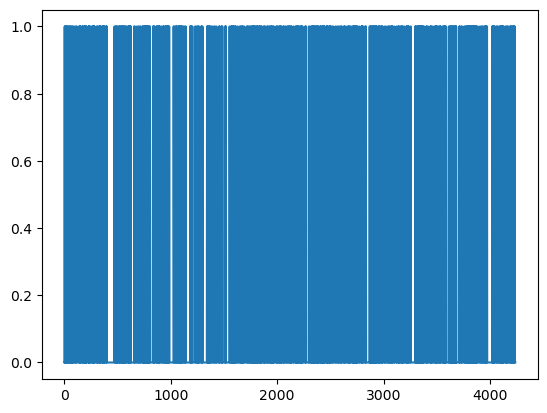

<Figure size 300x200 with 0 Axes>

In [19]:
laste = df['TenYearCHD'].plot()
plt.show(laste)

In [20]:
# Blue bars: Indicate the absence of heart disease.
# White space (gaps): These represent the presence of heart disease.

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 5: Fitting Logistic Regression Model for Heart Disease Prediction</p>

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 6: Evaluating Logistic Regression Model</p>

In [22]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8339253996447602


The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       938
           1       0.52      0.06      0.11       188

    accuracy                           0.83      1126
   macro avg       0.68      0.52      0.51      1126
weighted avg       0.79      0.83      0.77      1126



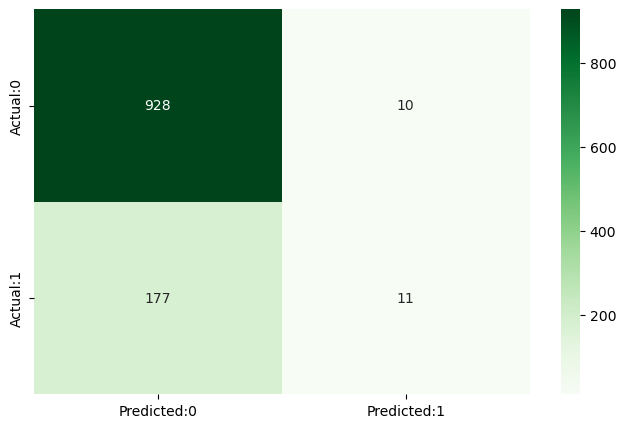

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       938
           1       0.52      0.06      0.11       188

    accuracy                           0.83      1126
   macro avg       0.68      0.52      0.51      1126
weighted avg       0.79      0.83      0.77      1126



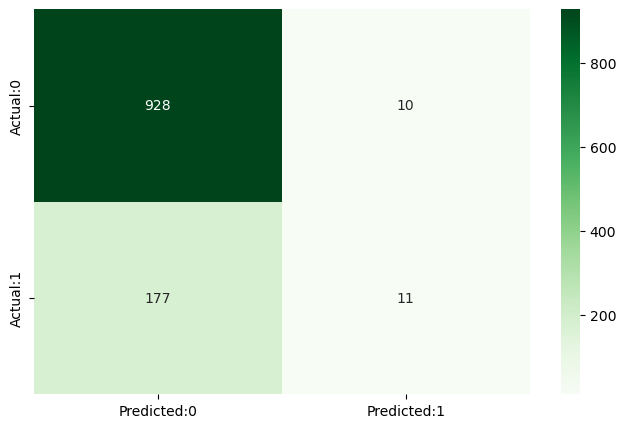

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()